In [287]:
import pandas as pd
import numpy as np

In [288]:
cctv_seoul = pd.read_csv('C:/data/01. CCTV_in_Seoul.csv', encoding= 'utf-8')

In [289]:
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [290]:
cctv_seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [291]:
cctv_seoul.columns[0]

'기관명'

In [292]:
cctv_seoul.rename(columns={cctv_seoul.columns[0] : '구별'}, inplace = True)
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [293]:
pop_seoul = pd.read_excel('C:/data/01. population_in_Seoul.xls', encoding = 'utf-8', header=2)
pop_seoul.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2017.1/4,합계,4202888.0,10197604.0,5000005.0,5197599.0,9926968.0,4871560.0,5055408.0,270636.0,128445.0,142191.0,2.36,1321458.0
1,2017.1/4,종로구,72654.0,162820.0,79675.0,83145.0,153589.0,75611.0,77978.0,9231.0,4064.0,5167.0,2.11,25425.0
2,2017.1/4,중구,59481.0,133240.0,65790.0,67450.0,124312.0,61656.0,62656.0,8928.0,4134.0,4794.0,2.09,20764.0
3,2017.1/4,용산구,106544.0,244203.0,119132.0,125071.0,229456.0,111167.0,118289.0,14747.0,7965.0,6782.0,2.15,36231.0
4,2017.1/4,성동구,130868.0,311244.0,153768.0,157476.0,303380.0,150076.0,153304.0,7864.0,3692.0,4172.0,2.32,39997.0


In [294]:
pop_seoul =pop_seoul.loc[:,['자치구','계','계.1','계.2','65세이상고령자']]

In [295]:
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [296]:
pop_seoul.rename(columns={pop_seoul.columns[0] :'구별',
                         pop_seoul.columns[1] : '인구수',
                         pop_seoul.columns[2] : '한국인',
                         pop_seoul.columns[3] : '외국인',
                         pop_seoul.columns[4] : '고령자'}, inplace = True)

In [297]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [298]:
pop_seoul.loc[1:5,['구별','인구수','한국인','외국인','고령자']]

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [299]:
pop_seoul.loc[1:5,['구별','인구수']]

,구별,인구수
1,종로구,162820.0
2,중구,133240.0
3,용산구,244203.0
4,성동구,311244.0
5,광진구,372164.0


In [300]:
pop_seoul.iloc[1:5,0:5]

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [301]:
pop_seoul['구별'].isin(['종로구','중구'])

0     False
1      True
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
Name: 구별, dtype: bool

In [302]:
pop_seoul[pop_seoul['구별'].isin(['종로구','중구'])]

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0


In [303]:
cctv_seoul.sort_values(by='소계',ascending = True).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [304]:
cctv_seoul.sort_values(by='소계',ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [305]:
cctv_seoul['최근증가율'] = (cctv_seoul['2016년'] + cctv_seoul['2015년'] + \
                      cctv_seoul['2014년']) / cctv_seoul['2013년도 이전'] * 100
cctv_seoul.sort_values(by = '최근증가율', ascending = False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [306]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [307]:
pop_seoul.drop([0], inplace = True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [308]:
pop_seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [309]:
pop_seoul[pop_seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [310]:
pop_seoul.drop([26],inplace = True)

In [311]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [312]:
pop_seoul['외국인 비율'] = pop_seoul['외국인']/pop_seoul['인구수'] * 100
pop_seoul['고령자 비율'] = pop_seoul['고령자']/pop_seoul['인구수'] * 100

In [313]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [314]:
pop_seoul.sort_values(by = '인구수', ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [315]:
pop_seoul.sort_values(by = '외국인 비율', ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [316]:
pop_seoul.sort_values(by = '고령자 비율', ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


In [317]:
df1 = pd.DataFrame({'A':['A0','A1','A2','A3'],
                  'B':['B0','B1','B2','B3'],
                  'C':['C0','C1','C2','C3'],
                  'D':['D0','D1','D2','D3']},
                 index = [0,1,2,3])

df2 = pd.DataFrame({'A':['A4','A5','A6','A7'],
                  'B':['B4','B5','B6','B7'],
                  'C':['C4','C5','C6','C7'],
                  'D':['D4','D5','D6','D7']},
                 index = [4,5,6,7])

df3 = pd.DataFrame({'A':['A8','A9','A10','A11'],
                  'B':['B8','B9','B10','B11'],
                  'C':['C8','C9','C10','C11'],
                  'D':['D8','D9','D10','D11']},
                 index = [8,9,10,11])


In [318]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [319]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [320]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [321]:
result = pd.concat([df1,df2,df3])

In [322]:
result = pd.concat([df1,df2,df3], keys=['x','y','z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [323]:
result.index

MultiIndex(levels=[['x', 'y', 'z'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]])

In [324]:
df4 = pd.DataFrame({'B':['B2','B3','B6','B7'],
                   'D': ['D2','D3','D6','D6'],
                   'F': ['F2','F3','F6','F7']},
                  index = [2,3,6,7])
result = pd.concat([df1, df4], axis = 1)

In [325]:
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D6,F7


In [326]:
result = pd.concat([df1,df4], axis = 1, join = 'inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [327]:
result = pd.concat([df1, df4], axis=1, join_axes = [df1.index])
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [328]:
result = pd.concat([df1, df4], ignore_index = True)
result

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D6,F7


In [329]:
left = pd.DataFrame({'key': ['K0','K4','K2','K3'],
                    'A': ['A0','A1','A2','A3'],
                    'B': ['B0','B1','B2','B3']})
right = pd.DataFrame({'key': ['K0','K1','K2','K3'],
                     'C': ['C0','C1','C2','C3'],
                     'D': ['D0','D1','D2','D3']})

In [330]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [331]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [332]:
pd.merge(left, right, on = 'key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [333]:
pd.merge(left, right, how = 'left', on = 'key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [334]:
pd.merge(left, right, how = 'right', on = 'key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3
3,K1,NaN,NaN,C1,D1


In [335]:
data_result = pd.merge(cctv_seoul, pop_seoul, on = '구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [336]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [337]:
data_result.set_index('구별',inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [338]:
np.corrcoef(data_result['고령자 비율'],data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [339]:
np.corrcoef(data_result['외국인 비율'],data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [340]:
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [341]:
data_result.sort_values(by='소계',ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [342]:
data_result.sort_values(by='인구수',ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [343]:
import matplotlib.pyplot as plt

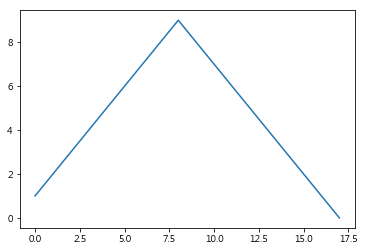

In [344]:
plt.figure
plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0])
plt.show()

In [345]:
t = np.arange(0,12,0.01)
y = np.sin(t)

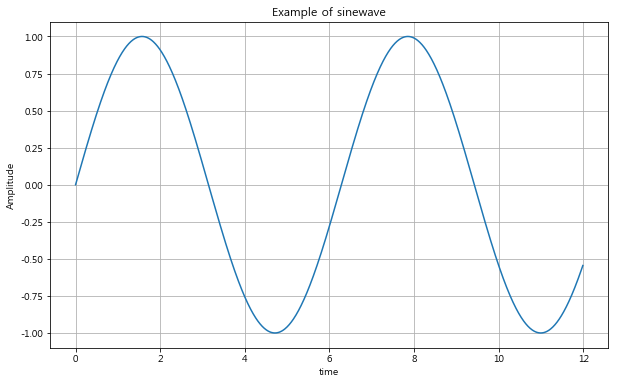

In [346]:
plt.figure(figsize = (10,6))
plt.plot(t,y)
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

In [347]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() =='Windows':
    path = "C:/Windows/Fonts/Malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)

In [348]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


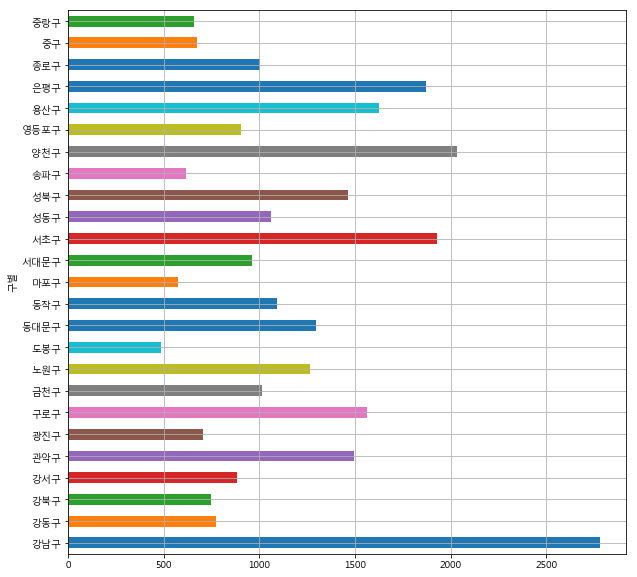

In [349]:
data_result['소계'].plot(kind = 'barh', grid=True, figsize = (10,10))
plt.show()

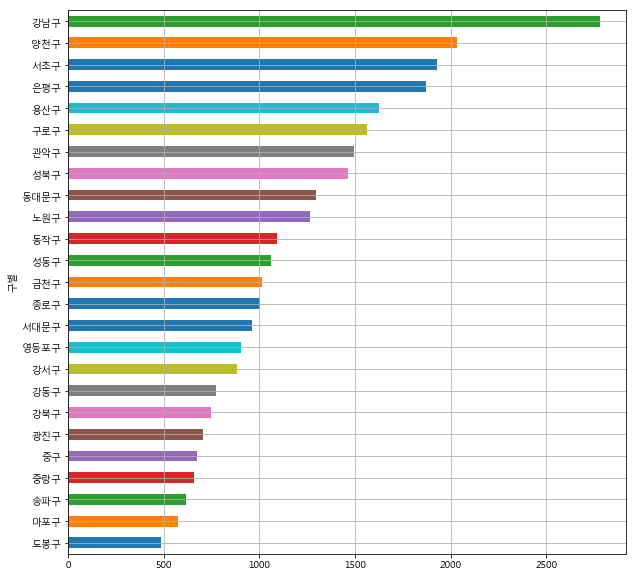

In [350]:
data_result['소계'].sort_values().plot(kind='barh',grid=True, figsize=(10,10))

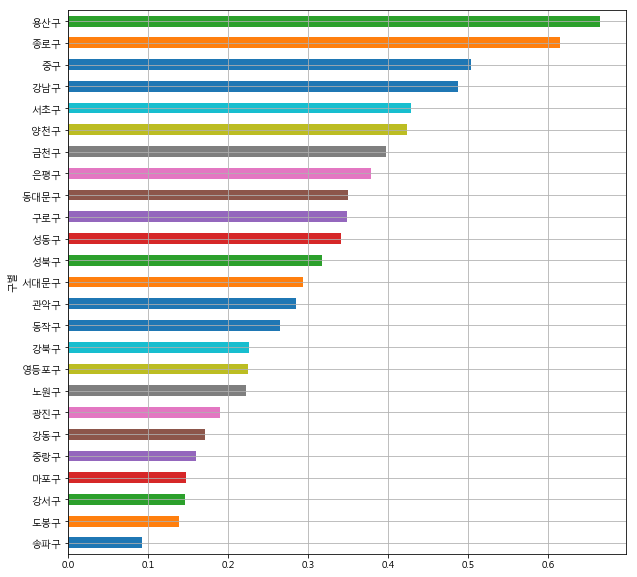

In [351]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result['CCTV비율'].sort_values().plot(kind ='barh', grid=True, figsize = (10,10))

plt.show()

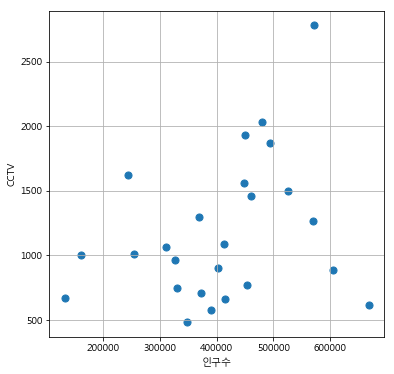

In [352]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [354]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV비율
구별,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.284673


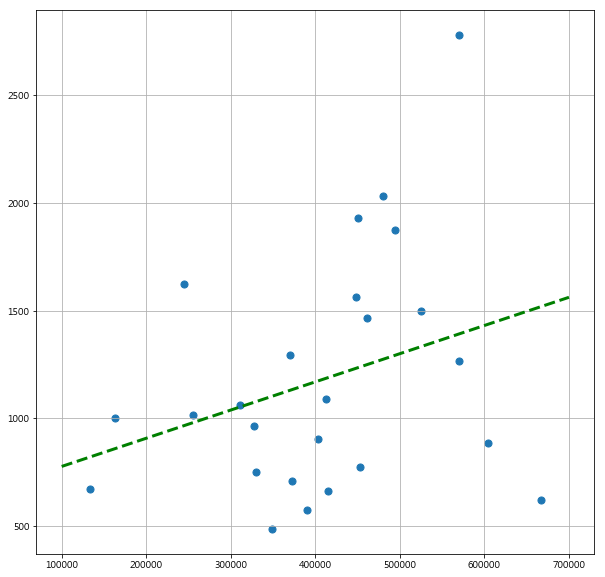

In [356]:
plt.figure(figsize =(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color = 'g')
plt.grid()
plt.show()


In [359]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


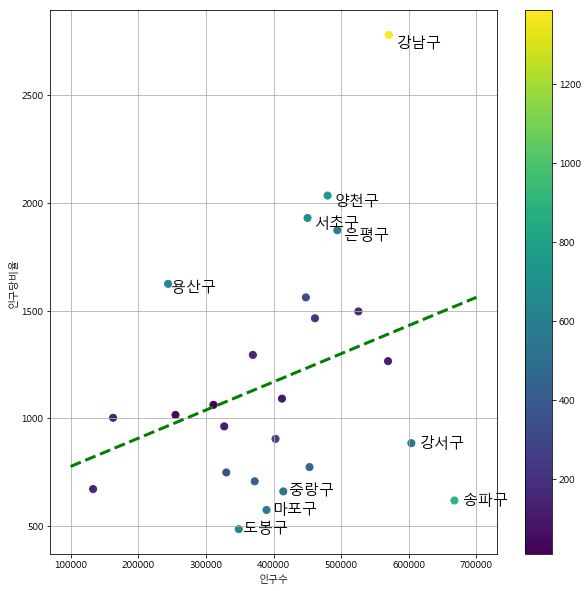

In [362]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'],
           c = data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98,
            df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')

plt.colorbar()
plt.grid()
plt.show()